# Example Notebook

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from NOrbit import NOrbit, Object

## N-Body Problem with Runge-Kutta 4th Order Method

The Runge-Kutta 4th order method (RK4) is implemented and used to calculate the evolution of the orbits of multiple objects around a primary one (e.g. planets of solar system around Sun). The Runge-Kutta 4th order method is arguably the most commonly used integration method for ordinary differential equations (ODE's) due to its high accuracy and simplicity. This method requires storing three intermediate stage values to get four functions. A certain superposition of the four functions is then calculated to get the next value of the calculation. The error of the scheme is of the order $\mathcal{O}(h^{5})$, which makes it a 4th-order method, with h being the step-size. The price for this high accuracy is that it requires four evaluations of the right-hand side function of the ODE's per time step. However, the stability is also improved compared to various lower order methods like the Euler method. The RK4 method is not stable enough over a long time period to trace highly chaotic orbits.

To understand what equations are necessary to integrate the N-body problem with the RK4 method, the according N-body problem is considered. The motion of N point masses in their mutual gravitational field is the classical N-body problem. Each particle i with mass $m_{i}$ has the location $r_{i}$ and the velocity $v_{i}$ at time t. The Hamiltonian of this system reads: $$H=\sum_{i=1}^{N}\frac{p_{i}}{2m_{i}}-\sum_{i=1}^{N}\sum_{j=i+1}^{N}\frac{Gm_{i}m_{j}}{|q_{i}-q_{j}|}$$ with the gravitational constant G and the canonical coordinates momentum $p_{i}=m_{i}v_{i}$ and location $q_{i}=r_{i}$ for all $i=1…N$ point masses. The Hamiltonian Equations yield the equations of motion for particle i: $$\dot{q}_{i}=\frac{\partial H}{\partial p_{i}} \Longrightarrow \frac{\text{d}r_{i}}{\text{d}t}=v_{i}$$ $$\dot{p}_{i}=-\frac{\partial H}{\partial q_{i}} \Longrightarrow \frac{\text{d}v_{i}}{\text{d}t}=a_{i}$$ with the acceleration: $$a_{i}(t)=\sum_{j\neq i}^{N}Gm_{j}\frac{r_{ij}}{|r_{ij}|^{3}}$$ where $r_{ij}$ is defined as: $r_{ij}=r_{j}(t)-r_{i}(t)$.

In order to calculate the trajectories of the point masses one needs to solve the corresponding equations of motion for each particle i, which is the system of ODE's given above with appropriate initial locations and velocities. In general, this is only possible via numerical methods. Thus, the particle distribution can only be determined at discrete time values. Starting from the current point in time $t=t_{n}$ the location and velocity at a later point in time $t_{n+1}=t_{n}+\Delta t$ are calculated. Then, $t_{n+1}$ takes the role of the current time instance $t_{n}$ and the algorithm continues to progress the solution until the desired end time is reached.

## Example 1: Solar system simulation

The first example considers a N-body simulation of the eight planets of the solar system with our Sun as the central body. The first step is to define the orbital elements and masses for all planets of the solar system, as well as the mass of the sun. The list of the solar system planets can be simply imported through the "Object" class. Then the BaseModel for the solar system is defined, which is necessary for the subsequent orbit calculations. The two input parameters are the just defined planetary elements and the mass of the sun.

In [2]:
planets_solar_system = Object.planets_solar_system # list of orbital elements and masses of solar system planets
ss_names = Object.planets_solar_system_names # names of solar system planets

m_sun = 1.0 # mass of sun in solar masses

solar_system = NOrbit(object_elements = planets_solar_system, m_primary = m_sun) # base model of solar system

The next step is to define the time-step of integration and the number of orbits of the first planet. The orbit function is applied to the BaseModel and the just defined parameters are given as input. Since one is just interested in the orbital plot, only the positions are calculated. To visualize the results of the orbit calculations an according 3D plot is made. Since the Sun is not significantly influenced by the solar system planets, the initial position is plotted. For the solar system planets one needs to plot the positions after every time-step for each planet in a for loop. The names of the planets are added in the label of the plotting instance. Lastly, title and axis labels are added. With the below defined parameters the computation time amounts to six minutes.

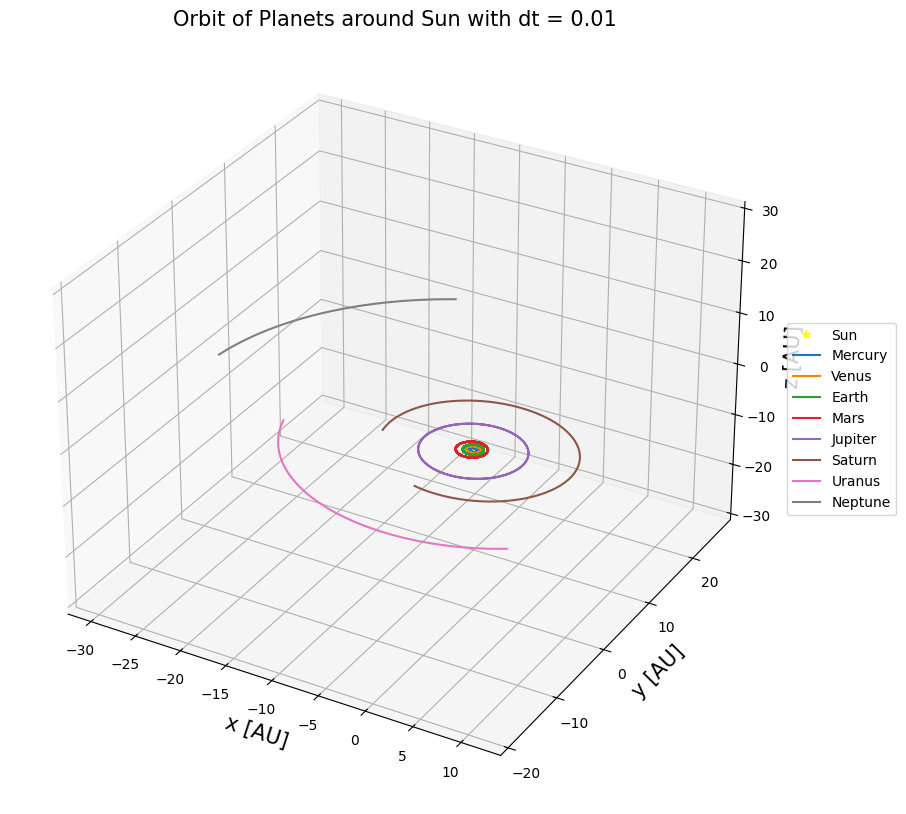

In [5]:
dt = 1/100 # time-step of integration
n_orbits = 100 # number of orbits of first planet (Merkury) around Sun

solar_system_positions = solar_system.orbit(dt = dt, n_orbits = n_orbits)[0] # orbital position calculations for planets and Sun

fig = plt.figure(figsize = (10, 10))
ax = plt.axes(projection = "3d")

# position of Sun
ax.plot3D(solar_system_positions[:, 0, 0], solar_system_positions[:, 0, 1], solar_system_positions[:, 0, 2], "*", color = "yellow", label = "Sun")

for i in range(len(planets_solar_system)):
    # orbital position evolution of planets
    ax.plot3D(solar_system_positions[:, i + 1, 0], solar_system_positions[:, i + 1, 1], solar_system_positions[:, i + 1, 2], label = f"{ss_names[i]}")

ax.set_title(f"Orbit of Planets around Sun with dt = {dt}", fontsize = 15)
ax.set_xlabel("x [AU]", fontsize = 15)
ax.set_ylabel("y [AU]", fontsize = 15)
ax.set_zlabel("z [AU]", fontsize = 15)
ax.set_zlim3d(-30, 30) # z-axis scaled
ax.legend(loc = "center left", bbox_to_anchor = (1, 0.5))
plt.show()

From the 3D plot one can see that all the eight solar system planet orbits are stable and that the scaled distances to the Sun correspond indeed to reality. The chosen time-step is sufficient to keep stable orbits for all planets over a long time. It can be increased, but the computation time will be much larger.

## Example 2: Inner solar system and Jupiter with asteroid belt

The second example considers a N-body simulation of the first five planets of the solar system and an asteroid belt between Mars and Jupiter consisting of 10 asteroids with our Sun as the central body. Like in the first example the orbital elements and masses for the planets are defined, as well as the mass of the sun. The list of the inner solar system planets can be simply imported through the "Object" class. The same goes for just a single planet, in this case Jupiter. Then the inner solar system planets and Jupiter are concatenated. To create the asteroid belt, one needs to define the orbital parameters and mass of them in a for loop. This is done by creating multiple arrays with the respective orbital elements and masses and storing them into a list for each iteration. The six orbital parameters are the semi-major axis $a$ (in astronomical units [AU]), the eccentricity $e$ (ranging from 0 (circular orbit) to 1(highly elliptical orbit)), the inclination $i$, the longitude of the ascending node $\Omega$, the argument of periapsis $\omega$ and the true anomaly $\theta$. The values for the orbital parameters and masses are typical main belt asteroid values and are sampled uniformally. Finally, the planets and asteroids are merged into a single list. The BaseModel for the objects is then defined, which takes as in the previous example the objects elements and the mass of the sun.

In [4]:
planets_inner_solar_system = Object.planets_inner_solar_system # list of orbital elements and masses of inner solar system planets
jupiter = Object.jupiter # orbital elements and mass of Jupiter
planets = planets_inner_solar_system + [jupiter] # list of orbital elements and masses of five planets
iss_names = Object.planets_inner_solar_system_names # names of inner solar system planets
jupiter_name = ["Jupiter"] # name of Jupiter
planets_names = iss_names + jupiter_name # names of five planets

n_asteroids = 10 # number of asteroids
asteroids = []
for i in range(n_asteroids):
    a_asteroids = np.random.uniform(2.0, 3.4) # semi-major axis in astronomical units
    e_asteroids = np.random.uniform(0.0, 0.4) # eccentricity
    i_asteroids = np.random.uniform(0.0, 20.0) # inclination
    Omega_asteroids = np.random.uniform(0.0, 360.0) # longitude of ascending nodes
    omega_asteroids = np.random.uniform(0.0, 360.0) # argument of periapsis
    theta_asteroids = np.random.uniform(0.0, 360.0) # true anomaly
    m_asteroids = np.random.uniform(1e-15, 1e-10) # mass
    # list of orbital elements and masses of asteroids
    asteroids.append([np.array((a_asteroids, e_asteroids, i_asteroids, Omega_asteroids, omega_asteroids, theta_asteroids, m_asteroids))])
    
objects = planets + asteroids # list of orbital elements and masses of all objects

m_sun = 1.0 # mass of sun in solar masses

asteroid_belt = NOrbit(object_elements = objects, m_primary = m_sun) # base model of objects

Like in the first example the time-step of integration and the number of orbits of the first planet are defined. The orbit function is applied to the BaseModel and the just defined parameters are given as input. Since one is just interested in the orbital plot, only the positions are calculated. To visualize the results of the orbit calculations an according 3D plot is made. Since the Sun is not significantly influenced by the five planets and asteroids, the initial position is plotted. For the five planets one needs to plot the positions after every time-step for each planet in a for loop. The names of the planets are added in the label of the plotting instance. In a separate for loop the positions of the asteroids are likewise plotted after every time-step. This is done so, because no labels for the asteroids are given and the color, linewidth and linestyle are changed. Lastly, title and axis labels are added. With the below defined parameters the computation time amounts to two minutes.

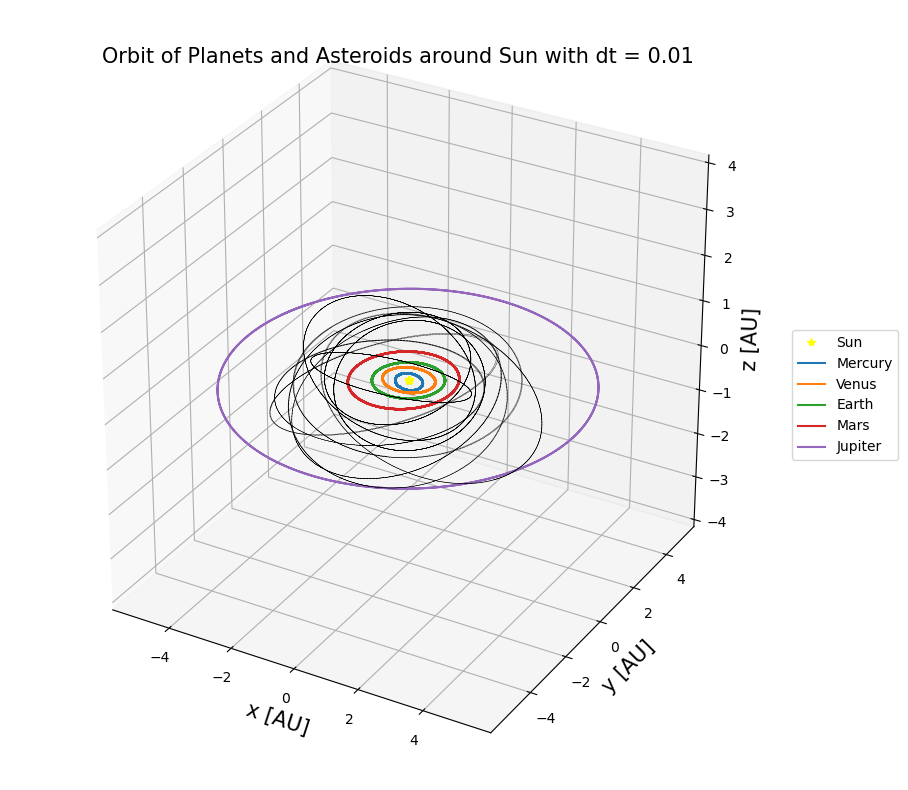

In [5]:
dt = 1/100 # time-step of integration
n_orbits = 100 # number of orbits of first planet (Merkury) around Sun

asteroid_belt_positions = asteroid_belt.orbit(dt = dt, n_orbits = n_orbits)[0] # orbital position calculations for objects and Sun

fig = plt.figure(figsize = (10, 10))
ax = plt.axes(projection = "3d")

# position of Sun
ax.plot3D(asteroid_belt_positions[:, 0, 0], asteroid_belt_positions[:, 0, 1], asteroid_belt_positions[:, 0, 2], "*", color = "yellow", label = "Sun")

for i in range(len(planets)):
    # orbital position evolution of planets
    ax.plot3D(asteroid_belt_positions[:, i + 1, 0], asteroid_belt_positions[:, i + 1, 1], asteroid_belt_positions[:, i + 1, 2], label = f"{planets_names[i]}")
    
for i in range(len(planets), len(objects)):
    # orbital position evolution of asteroids
    ax.plot3D(asteroid_belt_positions[:, i + 1, 0], asteroid_belt_positions[:, i + 1, 1], asteroid_belt_positions[:, i + 1, 2], "--", color = "k", linewidth = 0.2)
        
ax.set_title(f"Orbit of Planets and Asteroids around Sun with dt = {dt}", fontsize = 15)
ax.set_xlabel("x [AU]", fontsize = 15)
ax.set_ylabel("y [AU]", fontsize = 15)
ax.set_zlabel("z [AU]", fontsize = 15)
ax.set_zlim3d(-4, 4) # z-axis scaled
ax.legend(loc = "center left", bbox_to_anchor = (1, 0.5))
plt.show()

From the 3D plot one can see that all the five planetary orbits are stable, as well as the 10 asteroid orbits between Mars and Jupiter. Also here, the distances of the objects to the sun correspond to reality. The chosen time-step is sufficient to keep stable orbits for all objects over a long time. It can be increased, but the computation time will be much larger.